# Prediction of The Mortality from Heart Failure

# Background and Aim
Heart failure is a disease greatly and negatively impact the quality of life and its prevailation and death rate is gradually increasing year by year. This project aims to predict the mortality from heart failure and extract its most important associative factors through multiple classificational algorithms.


# Data Collection


In [1]:
# import what we need here
import numpy as np
import pandas as pd
import os


In [2]:
# the data source
# PLEASE put the corresponding csv dataset into the root directory of the colab!!! The file will be deleted everytime here!!!
# the corresponding file is available at https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [3]:
# explore data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# see the completness and more of this dataframe
df.info()
# there are only 299 records in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# check the unique value of each feature
pd.set_option('display.max_rows', None) # in case if there are too many features
df.nunique()

# With the consideration of the clinical data property, it can be inferred that anaemia, diabetes, high blood pressure, sex, smoking, 
# and DEATH_EVENT are categorical variables 

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Sex - Gender of patient Male = 1, Female =0

Age - Age of patient

Diabetes - 0 = No, 1 = Yes

Anaemia - 0 = No, 1 = Yes

High_blood_pressure - 0 = No, 1 = Yes

Smoking - 0 = No, 1 = Yes

DEATH_EVENT - 0 = No, 1 = Yes

*Reference: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/discussion/181241, by Yankun Song*

In [6]:
# check missing value
df.isnull().sum() # very lucky to have no missing value here

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
# check duplicated record
df.duplicated().where(df.duplicated() != False).count()
# no duplication

0

In [8]:
# get target variable
y = df['DEATH_EVENT']

In [9]:
# descriptive statistics of the continuous variables
df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].describe()
# The reason why I did not include time is, the time stands for following up period
# It seems to be not sensible to say that "the longer we follow-up, the greater the possiblity that patient will pass away from HF"
# the median ejection fraction is only 38 (%), indicating that at least half of the patient are currently suffering from HF

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


In [10]:
# visulization of the data
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='DEATH_EVENT', ylabel='serum_sodium'>

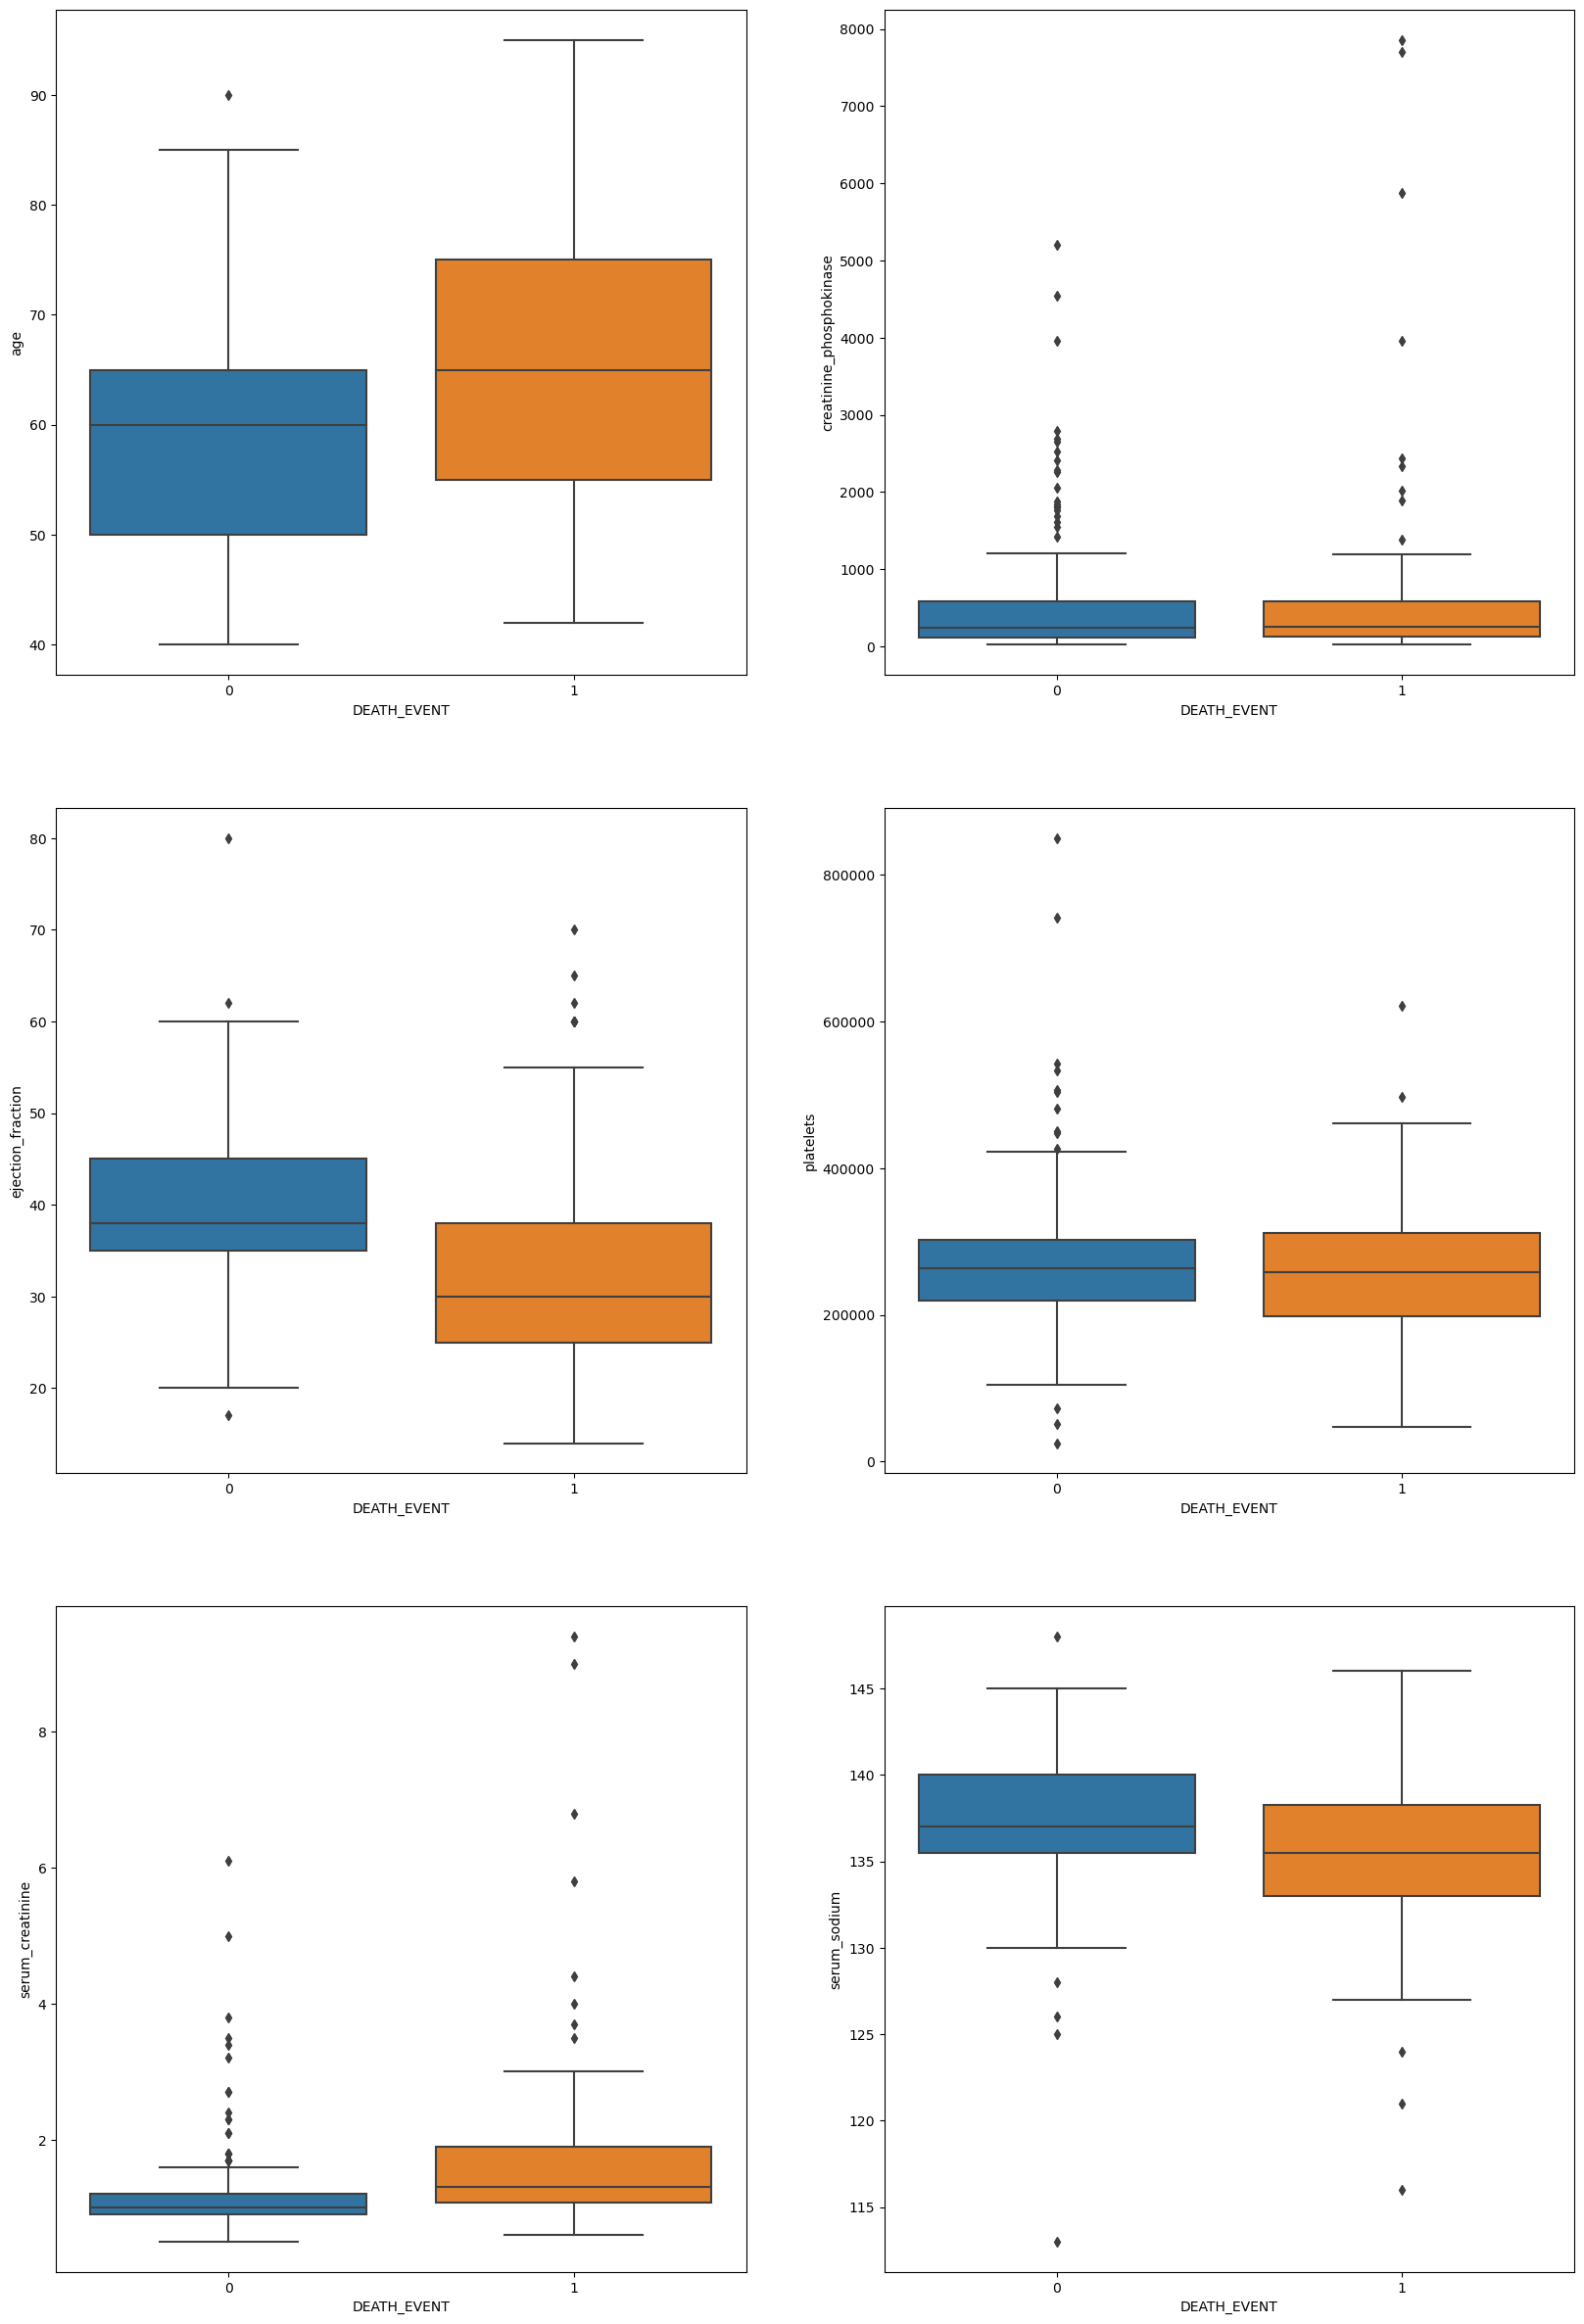

In [11]:
_,axss = plt.subplots(3,2, figsize=[20,30]) # set canvas
sns.boxplot(x='DEATH_EVENT', y ='age', data=df, ax=axss[0][0])
sns.boxplot(x='DEATH_EVENT', y ='creatinine_phosphokinase', data=df, ax=axss[0][1])
sns.boxplot(x='DEATH_EVENT', y ='ejection_fraction', data=df, ax=axss[1][0])
sns.boxplot(x='DEATH_EVENT', y ='platelets', data=df, ax=axss[1][1])
sns.boxplot(x='DEATH_EVENT', y ='serum_creatinine', data=df, ax=axss[2][0])
sns.boxplot(x='DEATH_EVENT', y ='serum_sodium', data=df, ax=axss[2][1])



In [12]:
# get statistic value of the numerical variables above
import scipy.stats as st

# t-test for age, and platelets
ttest_features = ['age', 'platelets']
i = 1

for feature in ttest_features:
  statistic, pvalue = st.ttest_ind(df[feature].where(df['DEATH_EVENT'] == 1).dropna(), 
                                   df[feature].where(df['DEATH_EVENT'] == 0).dropna(), equal_var=True)
  print(f'{i}. ', f'For {feature}, t = {round(statistic, 3)}, p-value = {round(pvalue, 3)}')
  print(f'{feature} is statistically significantly different between two groups\n') if pvalue < 0.05\
  else print(f'{feature} is NOT statistically significantly different between two groups\n')
  i += 1

# ranked test for other continuous vars ('creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium')
ranked_test_features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

i = 3

for feature in ranked_test_features:
  statistic, pvalue = st.mannwhitneyu(df[feature].where(df['DEATH_EVENT'] == 1).dropna(), 
                                df[feature].where(df['DEATH_EVENT'] == 0).dropna())
  print(f'{i}. ', f'For {feature}, U = {round(statistic, 3)}, p-value = {round(pvalue, 3)}')
  print(f'{feature} is statistically significantly different between two groups\n') if pvalue < 0.05\
  else print(f'{feature} is NOT statistically significantly different between two groups\n')
  i += 1

# It a bit messy, yet according to the statistic results, age, ejection_fraction, serium_creatine, and serum_sodium are possible viable
# feature for model, yet platelets and creatinine phosphokinase are possibly not

# therefore, we might drop 'platelets', 'creatinine_phosphokinase', 'time' before model training



1.  For age, t = 4.521, p-value = 0.0
age is statistically significantly different between two groups

2.  For platelets, t = -0.848, p-value = 0.397
platelets is NOT statistically significantly different between two groups

3.  For creatinine_phosphokinase, U = 10028.0, p-value = 0.684
creatinine_phosphokinase is NOT statistically significantly different between two groups

4.  For ejection_fraction, U = 6311.5, p-value = 0.0
ejection_fraction is statistically significantly different between two groups

5.  For serum_creatinine, U = 14190.0, p-value = 0.0
serum_creatinine is statistically significantly different between two groups

6.  For serum_sodium, U = 7226.5, p-value = 0.0
serum_sodium is statistically significantly different between two groups



<Axes: xlabel='DEATH_EVENT', ylabel='count'>

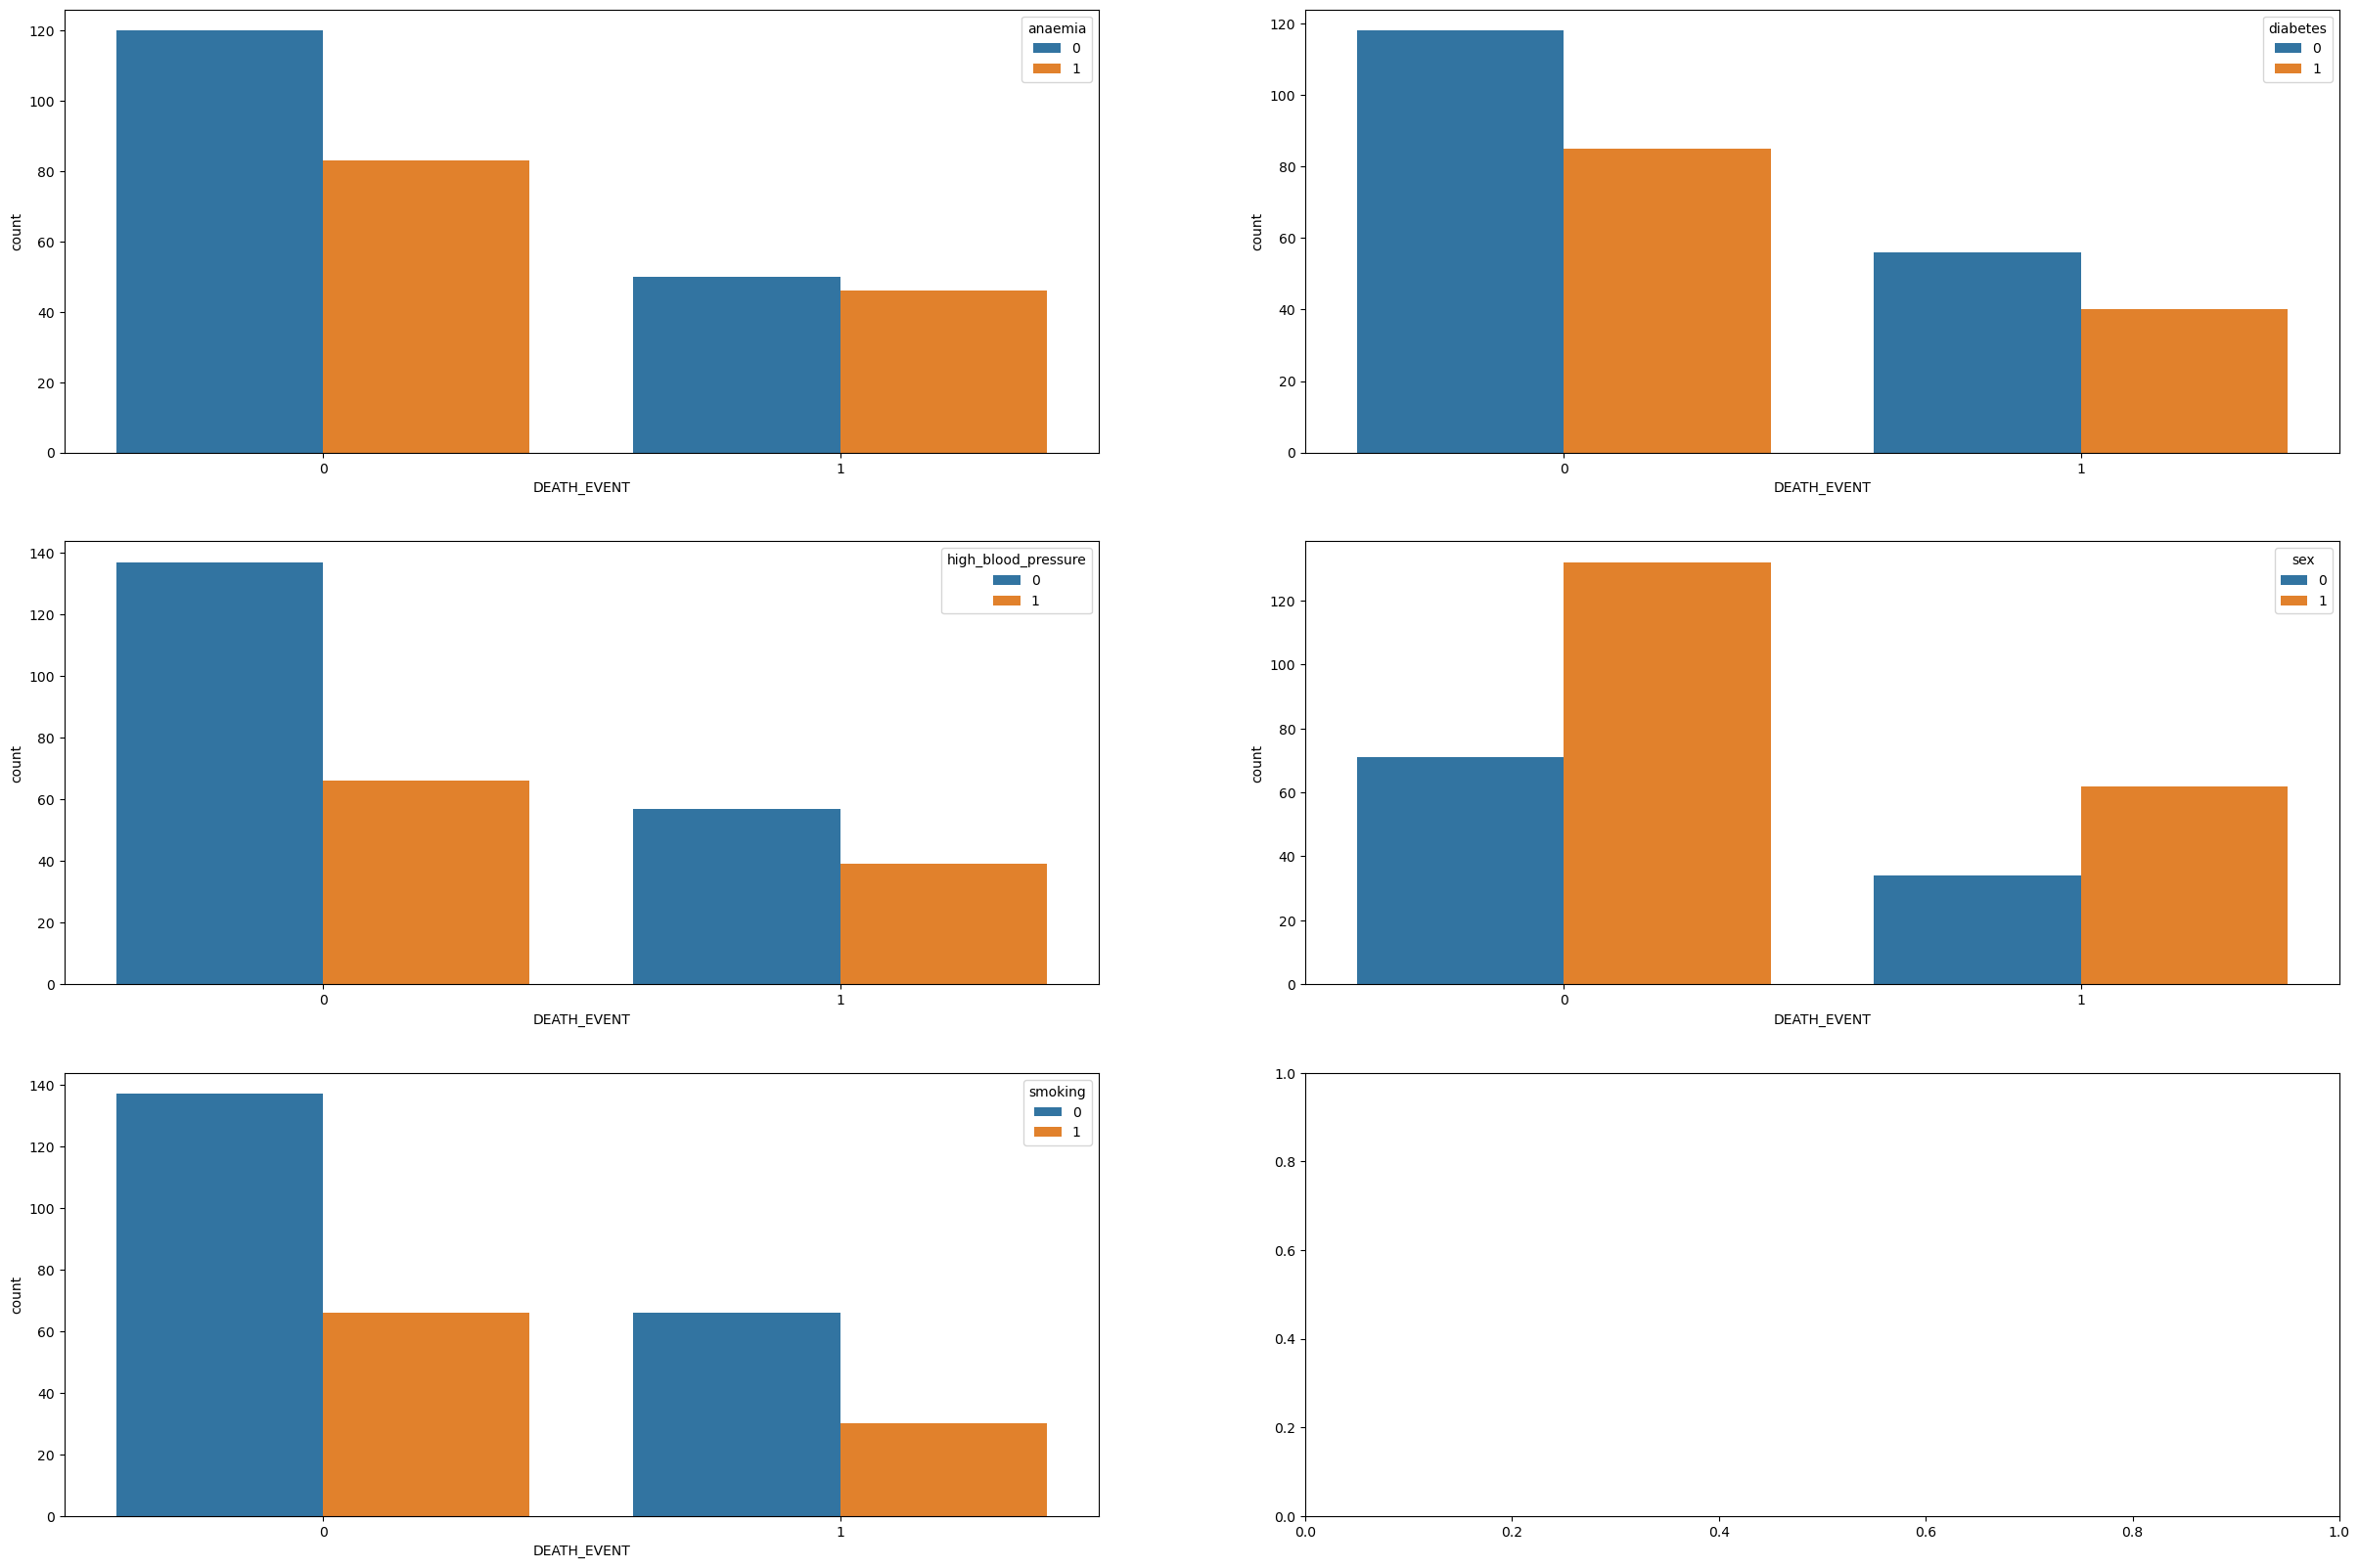

In [13]:
# Description of Categorical Feature (anaemia, diabetes, high blood pressure, sex, smoking)
_,axss = plt.subplots(3,2, figsize=[30,20])

sns.countplot(x='DEATH_EVENT', hue='anaemia', data=df, ax=axss[0][0])
sns.countplot(x='DEATH_EVENT', hue='diabetes', data=df, ax=axss[0][1])
sns.countplot(x='DEATH_EVENT', hue='high_blood_pressure', data=df, ax=axss[1][0])
sns.countplot(x='DEATH_EVENT', hue='sex', data=df, ax=axss[1][1])
sns.countplot(x='DEATH_EVENT', hue='smoking', data=df, ax=axss[2][0])

# Seeming that only anaemia, and hypertension are relevant to the mortality from HF


In [14]:
# chi-square test for categorical vars
cat_vars = ['anaemia', 'diabetes','high_blood_pressure','sex','smoking']

i = 1
for feature in cat_vars:
  # establish a contigency table
  contigency = pd.crosstab(df[feature],df['DEATH_EVENT'])
  print(contigency) # see if there is anything wrong with the contigency table
  statistic, pvalue, dof, expected_freq = st.chi2_contingency(contigency)
  print(f'{i}. For {feature}, chi = {round(statistic, 3)}, p-value = {round(pvalue, 3)}')
  # statistically sig or not if alpha = 0.05
  if pvalue < 0.05:
    print(f'{feature} distribution is statistically significant between two outcomes.\n')
  else:
    print(f'{feature} distribution is NOT statistically significant between two outcomes.\n')
  i += 1

# Therefore, this project will drop 'diabetes','smoking'

DEATH_EVENT    0   1
anaemia             
0            120  50
1             83  46
1. For anaemia, chi = 1.042, p-value = 0.307
anaemia distribution is NOT statistically significant between two outcomes.

DEATH_EVENT    0   1
diabetes            
0            118  56
1             85  40
2. For diabetes, chi = 0.0, p-value = 1.0
diabetes distribution is NOT statistically significant between two outcomes.

DEATH_EVENT            0   1
high_blood_pressure         
0                    137  57
1                     66  39
3. For high_blood_pressure, chi = 1.543, p-value = 0.214
high_blood_pressure distribution is NOT statistically significant between two outcomes.

DEATH_EVENT    0   1
sex                 
0             71  34
1            132  62
4. For sex, chi = 0.0, p-value = 1.0
sex distribution is NOT statistically significant between two outcomes.

DEATH_EVENT    0   1
smoking             
0            137  66
1             66  30
5. For smoking, chi = 0.007, p-value = 0.932
smoki

# Feature Preprocessing

In [15]:
# Drop useless features
to_drop = ['platelets', 'creatinine_phosphokinase', 'time', 'DEATH_EVENT', 'diabetes', 'smoking'] # don't forget the outcome!!!
x = df.drop(to_drop, axis = 1)

In [16]:
x.head()

,age,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex
0,75.0,0,20,1,1.9,130,1
1,55.0,0,38,0,1.1,136,1
2,65.0,0,20,0,1.3,129,1
3,50.0,1,20,0,1.9,137,1
4,65.0,1,20,0,2.7,116,0


In [49]:
# change categorical vars into objects
cat_cols = ['anaemia', 'high_blood_pressure','sex']

for cat in cat_cols:
  x[cat] = x[cat].astype('object')

x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    object 
 2   ejection_fraction    299 non-null    float64
 3   high_blood_pressure  299 non-null    object 
 4   serum_creatinine     299 non-null    float64
 5   serum_sodium         299 non-null    float64
 6   sex                  299 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.5+ KB


In [18]:
# for binary variables, ordinary encoder is enough
from sklearn.preprocessing import OrdinalEncoder

enc_oe = OrdinalEncoder()

for cat in cat_cols:
  enc_oe.fit(x[[cat]])
  x[[cat]] = enc_oe.transform(x[[cat]])

x.head()


,age,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex
0,75.0,0.0,20,1.0,1.9,130,1.0
1,55.0,0.0,38,0.0,1.1,136,1.0
2,65.0,0.0,20,0.0,1.3,129,1.0
3,50.0,1.0,20,0.0,1.9,137,1.0
4,65.0,1.0,20,0.0,2.7,116,0.0


In [19]:
# standarize continuous data
from sklearn.preprocessing import StandardScaler
num_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
scaler = StandardScaler()
scaler.fit(x[num_cols])

x[num_cols] = scaler.transform(x[num_cols])
x.head()

,age,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex
0,1.192945,0.0,-1.530560,1.0,0.490057,-1.504036,1.0
1,-0.491279,0.0,-0.007077,0.0,-0.284552,-0.141976,1.0
2,0.350833,0.0,-1.530560,0.0,-0.090900,-1.731046,1.0
3,-0.912335,1.0,-1.530560,0.0,0.490057,0.085034,1.0
4,0.350833,1.0,-1.530560,0.0,1.264666,-4.682176,0.0


# Model Training & Evaluation

In [20]:
# Train-Test Split
from sklearn import model_selection

# Reserve 20% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.20, stratify = y, random_state = 1) #stratified sampling
# the dataset is relatively small, hence this project use 20% data on testing

print('training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')

training data has 239 observation with 7 features
test data has 60 observation with 7 features


In [22]:
#@title build models
# There are three models we are going to use during this project
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# This is for confusion matrix
from sklearn import metrics, model_selection 


# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# Support Vector Classification
classifier_SVC = SVC(probability=True)

# GB classifier
classifier_GB = GradientBoostingClassifier()

Logistic Regressional Classifier

For Logistic Regressional Classifier, the acc is 78.68   (63.07  ~ 94.29) %


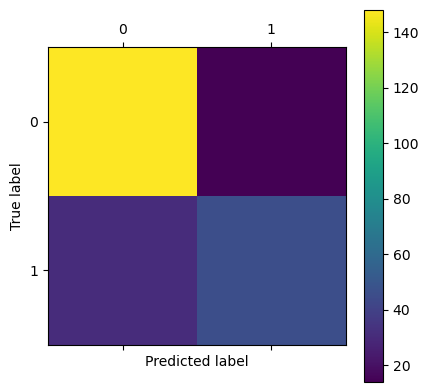

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       162
           1       0.77      0.60      0.67        77

    accuracy                           0.81       239
   macro avg       0.80      0.76      0.77       239
weighted avg       0.81      0.81      0.80       239



In [23]:
#@title Logistic Regressional Classifier & evaluation (by default)
classifier_logistic.fit(x_train, y_train) # train model
y_predict = classifier_logistic.predict(x_train) # predict results

# too stochastic, so I don't use point estimation to measure such a result
# res_1 = classifier_logistic.score(x_train, y_train)
# print(f'The acc for logistic classifier is {round(res_1 * 100, 3)}%')  

# cross validation
scores = model_selection.cross_val_score(classifier_logistic, x_train, y_train, cv = 10)
print(f'For Logistic Regressional Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))


For KNN, the acc is 74.51   (61.81  ~ 87.21000000000001) %


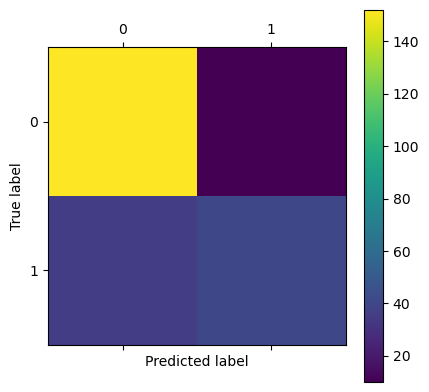

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       162
           1       0.80      0.53      0.64        77

    accuracy                           0.81       239
   macro avg       0.81      0.74      0.75       239
weighted avg       0.81      0.81      0.80       239



In [24]:
#@title KNN Classifier
classifier_KNN.fit(x_train, y_train) # train model
y_predict = classifier_KNN.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_KNN, x_train, y_train, cv = 10)
print(f'For KNN, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

Random Forest

For RF, the acc is 77.01   (63.84  ~ 90.18) %


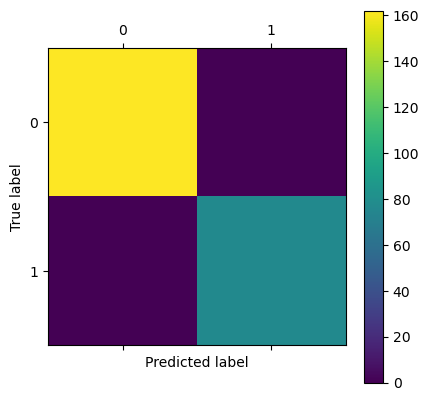

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



In [25]:
#@title Random Forest
classifier_RF.fit(x_train, y_train) # train model
y_predict = classifier_RF.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_RF, x_train, y_train, cv = 10)
print(f'For RF, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

# It is all correct in training dataset, is that overfitting?

SVC

For SVC, the acc is 76.99   (63.74  ~ 90.24) %


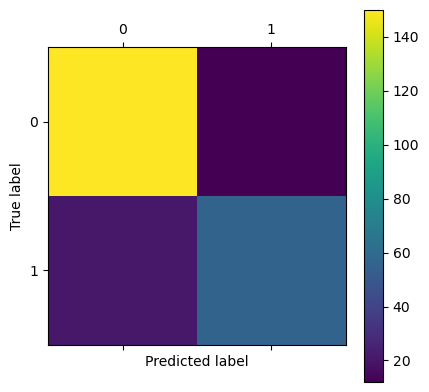

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       162
           1       0.82      0.73      0.77        77

    accuracy                           0.86       239
   macro avg       0.85      0.83      0.84       239
weighted avg       0.86      0.86      0.86       239



In [26]:
#@title SVC
classifier_SVC.fit(x_train, y_train) # train model
y_predict = classifier_SVC.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_SVC, x_train, y_train, cv = 10)
print(f'For SVC, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))



GB Classifier

For GB Classifier, the acc is 72.01   (57.59  ~ 86.43) %


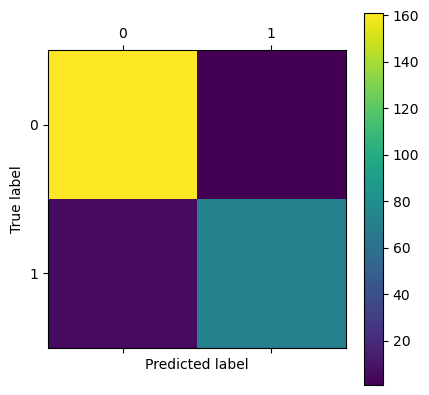

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       162
           1       0.99      0.92      0.95        77

    accuracy                           0.97       239
   macro avg       0.98      0.96      0.97       239
weighted avg       0.97      0.97      0.97       239



In [27]:
#@title GB Classifier
classifier_GB.fit(x_train, y_train) # train model
y_predict = classifier_GB.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_GB, x_train, y_train, cv = 10)
print(f'For GB Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

Optimize Hyperparameters

In [28]:
#@title Prelude
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

Model 1 - Logistic Regression

In [29]:
#@title Logistic Regression Optimization
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 10)
Grid_LR.fit(x_train, y_train)

# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)   # C:(around) 0.19, penality, l2

Best score: 0.7826086956521741
Best parameters set:
C:0.019
penalty:l2


The test acc of the "best" model for logistic regression is 70.0 %


C:\Users\Raymo\AppData\Local\Temp\ipykernel_23304\314962870.py:10: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')


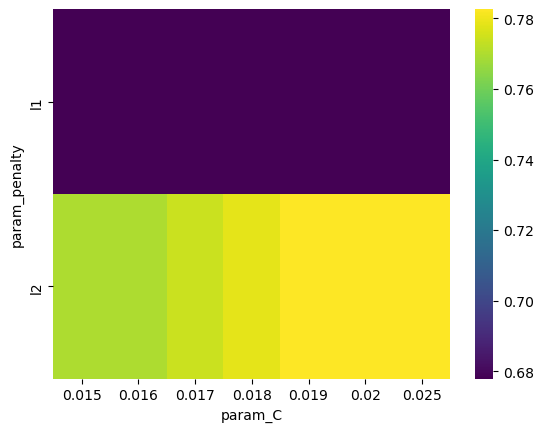

In [30]:
# Use the LR model with the "best" parameter
best_LR_model = Grid_LR.best_estimator_

best_LR_model.predict(x_test)

print('The test acc of the "best" model for logistic regression is', best_LR_model.score(x_test, y_test) * 100, '%')

# mapping the relationship between each parameter and the corresponding acc
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

Model 2 - KNN Model

In [31]:
#@title Find the optimal hyperparameter of KNN model
# Choose k and more
parameters = {
    'n_neighbors':[7,8,9,10,11,12,13,14,15],
    'weights':['uniform', 'distance'],
    'leaf_size':[1,2,3,4,5,6,7],
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10)
Grid_KNN.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_KNN)  # n_neighbours: 13, leaf_size:1, weights:uniform

Best score: 0.7782608695652173
Best parameters set:
leaf_size:1
n_neighbors:13
weights:uniform


In [32]:
best_KNN_model = Grid_KNN.best_estimator_

best_KNN_model.predict(x_test)

print('The test acc of the "best" model for KNN is', best_KNN_model.score(x_test, y_test) * 100, '%')


The test acc of the "best" model for KNN is 68.33333333333333 %


Model 3 - RF

In [33]:
#@title Find the optimal hyperparameter of RF
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [65,66,67,68,69,70,71,72,73,74],
    'max_depth': [11,12,13,14]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_RF)  # n_estimators:70, max_depth: 11

Best score: 0.7910460992907801
Best parameters set:
max_depth:11
n_estimators:73


In [34]:
best_RF_model = Grid_RF.best_estimator_

best_RF_model.predict(x_test)

print('The test acc of the "best" model for RF is', best_RF_model.score(x_test, y_test) * 100, '%')

The test acc of the "best" model for RF is 68.33333333333333 %


Model 4 - SVC

In [35]:
#@title Find the optimal hyperparameter of SVC
# Possible hyperparamter options for SVC
parameters = {
    'C' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'degree': [0,1,2,3,4,5,6],
}
Grid_SVC = GridSearchCV(SVC(probability = True), parameters, cv=5)
Grid_SVC.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_SVC)  # C: 0.7, degree:0

Best score: 0.7868794326241135
Best parameters set:
C:0.7
degree:0


In [36]:
best_SVC_model = Grid_SVC.best_estimator_

best_SVC_model.predict(x_test)

print('The test acc of the "best" model for SVC is', best_SVC_model.score(x_test, y_test) * 100, '%')

The test acc of the "best" model for SVC is 63.33333333333333 %


Model 5 - GB Classifier

In [37]:
#@title Find the optimal hyperparameter of GB Classifier
# Possible hyperparamter options for GB Classifier
parameters = {
    'learning_rate' : [0.1, 0.2, 0.3],
    'n_estimators': [20, 30, 40, 50],
    'subsample': [0.7],
    'min_samples_split':[1,9, 2, 2.1]
}
Grid_GB = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10)
Grid_GB.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_GB)  # learning_rate:0.3 min_samples_split:2 n_estimators:20 subsample:0.7

Best score: 0.7744565217391304
Best parameters set:
learning_rate:0.2
min_samples_split:9
n_estimators:20
subsample:0.7


C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Raymo\anaconda3\lib\site-packages

In [38]:
best_GB_model = Grid_GB.best_estimator_

best_GB_model.predict(x_test)

print('The test acc of the "best" model for GB classifier is', best_GB_model.score(x_test, y_test) * 100, '%')

The test acc of the "best" model for GB classifier is 58.333333333333336 %


## Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)
**Precision**(PPV, positive predictive value): tp / (tp + fp);
High Precision means low fp

**Recall**(sensitivity, hit rate, true positive rate): tp / (tp + fn)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [40]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(x_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(x_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(x_test))),
    ("SVC", confusion_matrix(y_test, best_SVC_model.predict(x_test))),
    ('GB Classifier', confusion_matrix(y_test, best_GB_model.predict(x_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.6833333333333333
precision is: 0.5
recall is: 0.42105263157894735

Logistic Regression
Accuracy is: 0.7
precision is: 0.6
recall is: 0.15789473684210525

K nearest neighbor
Accuracy is: 0.6833333333333333
precision is: 0.5
recall is: 0.21052631578947367

SVC
Accuracy is: 0.6333333333333333
precision is: 0.4
recall is: 0.3157894736842105

GB Classifier
Accuracy is: 0.5833333333333334
precision is: 0.3125
recall is: 0.2631578947368421



### Model Evaluation - ROC & AUC

**All the classifier used here have predict_prob() function, generating the corresponding prediction probability of the classification as category "1"**

In [41]:
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics


ROC of Random Forest

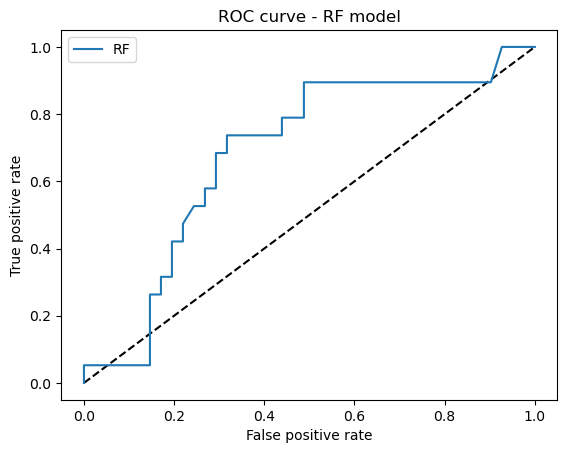

The AUC of RF model is 0.6835686777920411


In [42]:
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of RF model is', metrics.auc(fpr_rf,tpr_rf))

AUC for Logistic Regression Model

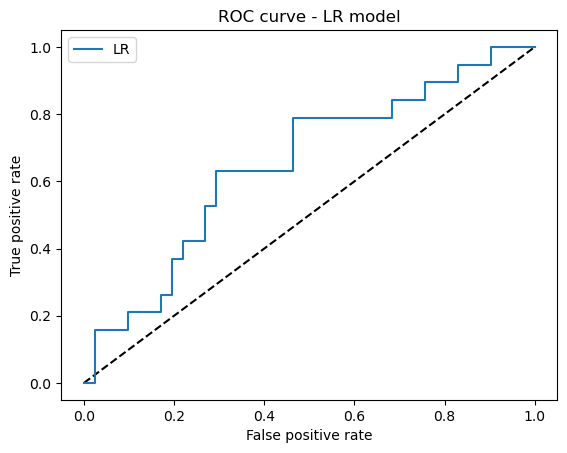

The AUC of LR model is 0.6508344030808729


In [43]:
# Use predict_proba to get the probability results of LR
y_pred_lr = best_LR_model.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of LR model is', metrics.auc(fpr_lr,tpr_lr))

AUC for KNN

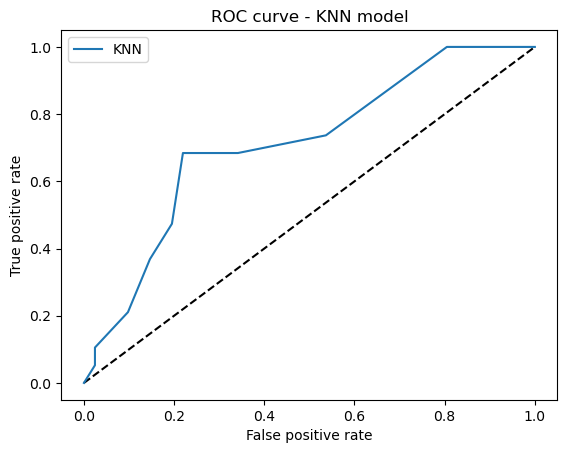

The AUC of KNN model is 0.711168164313222


In [44]:
# Use predict_proba to get the probability results of KNN
y_pred_knn = best_KNN_model.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN model')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of KNN model is', metrics.auc(fpr_knn,tpr_knn))

AUC for SVC

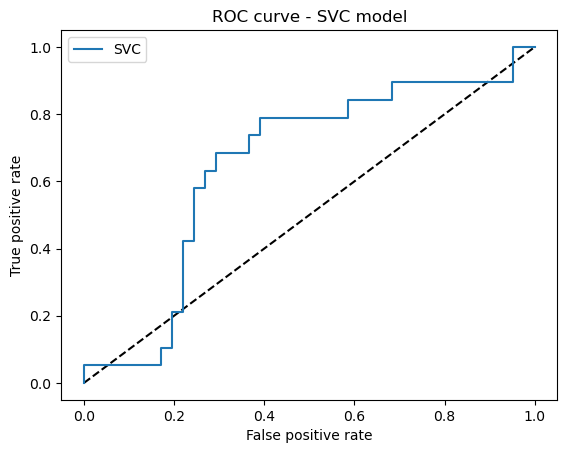

The AUC of SVC model is 0.6495507060333761


In [45]:
# Use predict_proba to get the probability results of SVC
y_pred_svc = best_SVC_model.predict_proba(x_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - SVC model')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of SVC model is', metrics.auc(fpr_svc,tpr_svc))

AUC for GB Classifier

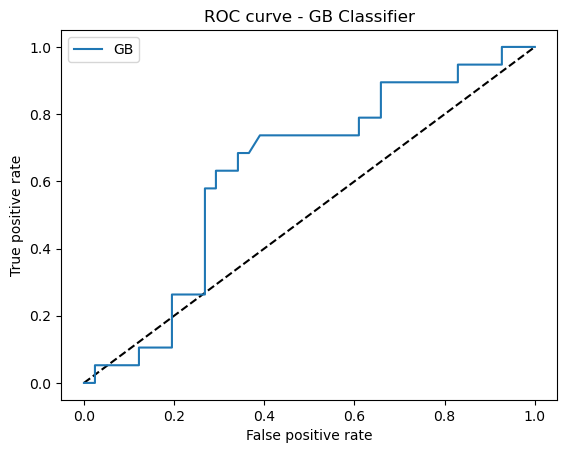

The AUC of GB Classifier is 0.6296534017971759


In [46]:
# Use predict_proba to get the probability results of GB Classifier
y_pred_gb = best_GB_model.predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb, tpr_gb, label='GB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - GB Classifier')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of GB Classifier is', metrics.auc(fpr_gb,tpr_gb))

**Despite relatively low acc, it seems that KNN performs relatively better when it comes to ROC (AUC = 0.71)**
**Therefore, I decide to use KNN to explain the weight for each feature**

## RF - Feature Importance Discussion
**Since the RF (2nd best model) can easily extract each feature's weight**, here we take it as example to see why the original author think **serum creatinine** and **ejection fraction** are the sole features to predict the mortality from the HF.

In [56]:
importances = best_RF_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by RF:")
for ind in range(x.shape[1]):
  print ("{0} : {1}".format(x.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by RF:
serum_creatinine : 0.2809
ejection_fraction : 0.2496
age : 0.2109
serum_sodium : 0.1666
sex : 0.0315
anaemia : 0.0304
high_blood_pressure : 0.0301


### Therefore, we can see that two features mentioned above are the most important factors contributed to the mortality of Heart Failure. 
Apart from that, **Age** and **Serum Sodium** are also the important contributing factor to HF

## Discussion

1. This project used multiple classifier models to predict the mortality from HF through limited but relatively clean data. 


2. In terms of AUC, the K-Nearest-Neighbour is the best amongst 5 models used above (Logistic Regression, Random Forest Classifier, K-nearest-neighbour, Support Vector Classification, GB Classifier). Yet it may require more data to obtain a more accurrate result and the usability of the model

3. Clinically, 1) serum creatinine reflects kidney function, which affects blood pressure (heart workload) & heart function and may vise versa. 2) ejection fraction is the proportion of the blood with in the heart that could be pumped from the heart per blood ejection within heart, which is also a direct index to classify the heart failure grade (usually chronic) according to the New York Criteria. Apart from which listed in the original article, 3) seniority is often the direct risk factor associate with the mortality of HF, 4) high serum sodium often leads to blood pressure, leading to the high heart workload and left ventricular hypertrophy.

4. Limitation: 1) due to the limited size of the data, including N of record and the limited fundamental representative of the feature, the accurracy of the model is limited. 2) It seems that the performance of the model other than logistic regression is not significantly higher than that of LR, this might be the reason why clinicians prefer to use traditional regression models to observe risk factors since their datasets are usually limited, 3) As a future scope, there could be several explainable classifier models worth exploring.



# Insight

  **For patient with heart failure, apart from controlling the process of HF by cardiological medicine, the maintainance of kidney function and low intake of sodium is also important to prolong the expected lifespan. **